## compare ebv


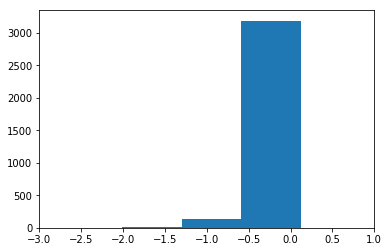

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
import os
"""
dir path
"""
file_drp='/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/drpall-v2_5_3.fits'
dir_ppxf='/Users/astro/Documents/notebooks/zs/pair-m-z/res/'
def compare_ebv():
    delta_ebv=[]
    with fits.open(file_drp) as f:
        ebv_drp=f[1].data.field('ebvgal')
        plateifu_drp=f[1].data.field('plateifu')
        for ebv,pifu in zip(ebv_drp,plateifu_drp):
            file_ppxf=dir_ppxf+pifu+'.txt'
            if os.path.exists(file_ppxf):
                with open(file_ppxf) as f_ppxf:
                    lines=f_ppxf.readlines()
                    if len(lines)>=13:
                        ebv_ppxf=lines[13][len('Gas Reddening E(B-V): '):]
                        ebv_ppxf=float(ebv_ppxf)
                        ebv=float(ebv)
                        ##### gal-ppxf
                        delta_ebv.append(ebv-ebv_ppxf)
                    else:
                        print(pifu,file=open('missing_ebv_in_ppxf.txt','a+'))

    plt.figure()
    plt.hist(delta_ebv)
    plt.xlim(-3,1)
    plt.show()
            
    
if __name__=='__main__':
    compare_ebv()

In [4]:
lines

NameError: name 'lines' is not defined